# Business Problem Solving

- Business Understanding
- Develop Hypothesis
- Data Collection
- Problem Mapping
- Solution Approach
- EDA
- Model Building
- Model Evaluation

# 1. Business Understanding

The company is term insurance provider based in India. Each observation corresponds to a pin code. Variables beginning with M refer to demographic statistics of the pin code, while variables beginning with P and A refer to product ownership and insurance statistics in the pin code. It wants to segment its customers on the basis of 'Avg Age', 'Income Range', 'Social Class' and on the buying percentage of the customer. We have to generate the buying percentage of the customer from the given data. We have to use 'KMeans' clustering for segmentation.

# 2. Developing Hypothesis

- Data has patterns to segment customers using KMeans clustering
- The variables can help us in categorizing customers based on the basis of average age, Income range Social class and buying percentage of a customer
- The given variables are enough to segment the data set

# 3. Data Collection

- The relevant data has been given to us which we can use to perform our analysis and if necessary model building

# 4. Problem Mapping

- Problem Mapping would be to segment the customers with the help of variables in the data set. And find out the section of customers that we can filter to increase the customer base in term insurance i.e. convince them to take term insurance from the company. Performing cluster profiling.

# 5. Solution Approach

- Performing EDA
- Generating buying percentage i.e. what percent chance does a customer have of buying the term insurance
- We will perform KMeans clustering and cluster profiling

# 6. Exploratory Data Analysis(EDA)

## Importing relevant libraries and adjusting display settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import rcParams
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import (train_test_split, GridSearchCV, 
                                     cross_validate, RepeatedStratifiedKFold)
from sklearn.metrics import (accuracy_score, recall_score, silhouette_score)
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans

In [2]:
# Setting display options

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
plt.style.use('fivethirtyeight')

In [3]:
abc_ins = pd.read_csv('ABC_Insurance.csv')

In [4]:
abc_ins.head()

,ID,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,TARGET
0,1,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## Checking structure of data

In [5]:
# Checking shape of the data

abc_ins.shape

(9822, 87)

In [6]:
# Looking at info of columns

abc_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 87 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID        9822 non-null   int64
 1   MOSTYPE   9822 non-null   int64
 2   MAANTHUI  9822 non-null   int64
 3   MGEMOMV   9822 non-null   int64
 4   MGEMLEEF  9822 non-null   int64
 5   MOSHOOFD  9822 non-null   int64
 6   MGODRK    9822 non-null   int64
 7   MGODPR    9822 non-null   int64
 8   MGODOV    9822 non-null   int64
 9   MGODGE    9822 non-null   int64
 10  MRELGE    9822 non-null   int64
 11  MRELSA    9822 non-null   int64
 12  MRELOV    9822 non-null   int64
 13  MFALLEEN  9822 non-null   int64
 14  MFGEKIND  9822 non-null   int64
 15  MFWEKIND  9822 non-null   int64
 16  MOPLHOOG  9822 non-null   int64
 17  MOPLMIDD  9822 non-null   int64
 18  MOPLLAAG  9822 non-null   int64
 19  MBERHOOG  9822 non-null   int64
 20  MBERZELF  9822 non-null   int64
 21  MBERBOER  9822 non-null   int64
 22  

In [7]:
# Checking for outliers, central tendency and variance of numerical columns in the data

abc_ins.describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.99])

,ID,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,TARGET
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000,9822.000000
mean,4911.500000,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,6.188964,0.873142,2.286602,1.887294,3.237324,4.302891,1.484525,3.307269,4.592038,1.898799,0.403278,0.545714,2.877113,2.226532,2.291183,1.650682,1.595093,2.204744,3.742211,1.068214,4.187742,4.819487,6.022501,1.335980,1.956730,6.254327,2.750662,2.577072,3.505498,2.739462,0.808491,0.208002,3.80452,4.260334,0.764915,0.038892,0.073712,2.956424,0.054877,0.170841,0.008858,0.019344,0.093565,0.011505,0.215027,0.202301,0.011505,0.018733,0.023315,1.849420,0.001629,0.015272,0.025351,0.016697,0.045408,0.400020,0.014050,0.021279,0.557218,0.011098,0.040216,0.002240,0.011403,0.034413,0.005192,0.071065,0.079821,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.03146,0.008450,0.013846,0.059662
std,2835.511506,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,1.896070,0.961955,1.710674,1.779238,1.609139,1.984152,1.645968,1.723377,2.279839,1.814406,0.786792,1.106349,1.846703,1.748025,1.684008,1.742410,1.321487,1.534163,1.944900,1.298229,3.093127,3.093541,1.543980,1.213627,1.596842,2.000374,2.002960,2.073125,1.871365,1.950625,1.173771,0.561832,1.33093,1.998913,0.956555,0.356924,0.507818,2.921736,0.566108,0.888518,0.237556,0.200885,0.604350,0.215408,0.810899,0.910574,0.188699,0.213712,0.375350,1.881271,0.057058,0.244210,0.157198,0.211487,0.396983,0.492001,0.126058,0.144319,0.608575,0.129928,0.223622,0.068402,0.116251,0.249706,0.109954,0.267432,0.384431,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.20907,0.092647,0.117728,0.236872
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [8]:
# Checking for duplicates

abc_ins.duplicated().sum()

0

In [9]:
# Checking for missing values

sum(abc_ins.isnull().sum())

0

In [10]:
abc_ins.nunique()

ID          9822
MOSTYPE       40
MAANTHUI       9
MGEMOMV        6
MGEMLEEF       6
MOSHOOFD      10
MGODRK        10
MGODPR        10
MGODOV         6
MGODGE        10
MRELGE        10
MRELSA         8
MRELOV        10
MFALLEEN      10
MFGEKIND      10
MFWEKIND      10
MOPLHOOG      10
MOPLMIDD      10
MOPLLAAG      10
MBERHOOG      10
MBERZELF       6
MBERBOER      10
MBERMIDD      10
MBERARBG      10
MBERARBO      10
MSKA          10
MSKB1         10
MSKB2         10
MSKC          10
MSKD          10
MHHUUR        10
MHKOOP        10
MAUT1         10
MAUT2          9
MAUT0         10
MZFONDS       10
MZPART        10
MINKM30       10
MINK3045      10
MINK4575      10
MINK7512      10
MINK123M       9
MINKGEM       10
MKOOPKLA       8
PWAPART        4
PWABEDR        7
PWALAND        5
PPERSAUT       7
PBESAUT        4
PMOTSCO        6
PVRAAUT        5
PAANHANG       6
PTRACTOR       6
PWERKT         6
PBROM          6
PLEVEN        10
PPERSONG       7
PGEZONG        3
PWAOREG       

- **Removing skewed variables**

In [11]:
# Filtering skewed variables as they are not useful in predicting classes

skew_num = []
        
num_vars = abc_ins.columns        
        
for var in num_vars:
    if 100*abc_ins[var].value_counts(normalize=True).values[0] > 85:
        skew_num.append(var)

skew_num = [i for i in skew_num if i != 'TARGET']
skew_num.sort()
print(skew_num)

['AAANHANG', 'ABESAUT', 'ABROM', 'ABYSTAND', 'AFIETS', 'AGEZONG', 'AINBOED', 'ALEVEN', 'AMOTSCO', 'APERSONG', 'APLEZIER', 'ATRACTOR', 'AVRAAUT', 'AWABEDR', 'AWALAND', 'AWAOREG', 'AWERKT', 'AZEILPL', 'MAANTHUI', 'PAANHANG', 'PBESAUT', 'PBROM', 'PBYSTAND', 'PFIETS', 'PGEZONG', 'PINBOED', 'PLEVEN', 'PMOTSCO', 'PPERSONG', 'PPLEZIER', 'PTRACTOR', 'PVRAAUT', 'PWABEDR', 'PWALAND', 'PWAOREG', 'PWERKT', 'PZEILPL']


In [12]:
# Dropping the skewed variables

abc_ins.drop(skew_num, axis=1, inplace=True)

In [13]:
# Checking shape of dataframe after removing skewed variables

abc_ins.shape

(9822, 50)

## Performing Exploratory Data Analysis

- **Checking for imbalance and Outliers in the data**

In [14]:
# Checking class imbalance

round(abc_ins['TARGET'].value_counts(normalize=True)*100,2)

0    94.03
1     5.97
Name: TARGET, dtype: float64

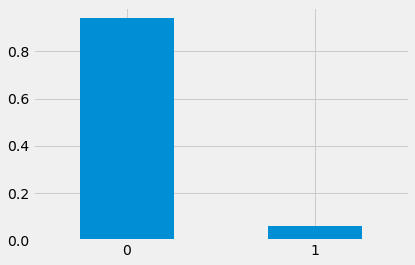

In [15]:
# Plotting class imbalance

abc_ins['TARGET'].value_counts(normalize=True).plot(kind='bar', rot=False)
plt.show();

- ***Observations:***
- We can see that there is clear case of class imbalance in the dataset, we need to keep this in mind while building the model
- We can also see that 'TARGET'==1 is negligible, we need to use class balancing techniques

In [16]:
# Creating a function for detecting outliers

def detect_outlier(data):
    perc = [0, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
    data_Stats = data.describe(percentiles=perc).T
    data_Stats['Name of variable'] = data_Stats.index
    data_Stats['Q1'] = data_Stats['25%']
    data_Stats['Q3'] = data_Stats['75%']
    data_Stats['IQR'] = data_Stats['Q3'] - data_Stats['Q1']
    data_Stats['upper_bound'] = data_Stats['Q3'] + 1.5 * data_Stats['IQR']
    data_Stats['lower_bound'] = data_Stats['Q1'] - 1.5 * data_Stats['IQR']
    data_Stats['No of points crossing upper_bound'] = (data > data_Stats['upper_bound']).sum()
    data_Stats['No of points crossing lower_bound'] = (data < data_Stats['lower_bound']).sum()
    outlier_detection = pd.DataFrame(data_Stats)
    return outlier_detection

In [17]:
# Checking for the outliers

outlier_check = detect_outlier(abc_ins)
outlier_check

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max,Name of variable,Q1,Q3,IQR,upper_bound,lower_bound,No of points crossing upper_bound,No of points crossing lower_bound
ID,9822.0,4911.500000,2835.511506,1.0,1.0,983.1,2456.25,4911.5,7366.75,8839.9,9330.95,9723.79,9822.0,ID,2456.25,7366.75,4910.5,14732.5,-4909.5,0,0
MOSTYPE,9822.0,24.253207,12.918058,1.0,1.0,6.0,10.00,30.0,35.00,39.0,39.95,41.00,41.0,MOSTYPE,10.00,35.00,25.0,72.5,-27.5,0,0
MGEMOMV,9822.0,2.677561,0.780701,1.0,1.0,2.0,2.00,3.0,3.00,4.0,4.00,5.00,6.0,MGEMOMV,2.00,3.00,1.0,4.5,0.5,109,0
MGEMLEEF,9822.0,2.996437,0.804660,1.0,1.0,2.0,2.00,3.0,3.00,4.0,4.00,5.00,6.0,MGEMLEEF,2.00,3.00,1.0,4.5,0.5,378,0
MOSHOOFD,9822.0,5.779067,2.874148,1.0,1.0,2.0,3.00,7.0,8.00,9.0,9.95,10.00,10.0,MOSHOOFD,3.00,8.00,5.0,15.5,-4.5,0,0
MGODRK,9822.0,0.700672,1.015107,0.0,0.0,0.0,0.00,0.0,1.00,2.0,2.00,4.00,9.0,MGODRK,0.00,1.00,1.0,2.5,-1.5,445,0
MGODPR,9822.0,4.637650,1.721212,0.0,0.0,2.0,4.00,5.0,6.00,7.0,7.00,9.00,9.0,MGODPR,4.00,6.00,2.0,9.0,1.0,0,127
MGODOV,9822.0,1.050092,1.011156,0.0,0.0,0.0,0.00,1.0,2.00,2.0,3.00,4.00,5.0,MGODOV,0.00,2.00,2.0,5.0,-3.0,0,0
MGODGE,9822.0,3.262981,1.606287,0.0,0.0,1.0,2.00,3.0,4.00,5.0,6.00,7.00,9.0,MGODGE,2.00,4.00,2.0,7.0,-1.0,27,0
MRELGE,9822.0,6.188964,1.896070,0.0,0.0,4.0,5.00,6.0,7.00,9.0,9.00,9.00,9.0,MRELGE,5.00,7.00,2.0,10.0,2.0,0,227


In [18]:
# Looking at the list of variables having outliers

outlier_check.drop(['ID', 'TARGET'], inplace=True)
outlier_vars = outlier_check.loc[(outlier_check['No of points crossing upper_bound']>0) | \
                                 (outlier_check['No of points crossing lower_bound']>0), :].index
outlier_vars = list(outlier_vars)
print(outlier_vars)

['MGEMOMV', 'MGEMLEEF', 'MGODRK', 'MGODPR', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKD', 'MAUT1', 'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'APERSAUT', 'ABRAND']


In [19]:
len(outlier_vars)

34

<strong><font color=green>
- Q1 = 25 percentile, Q2 = 50 percentile, Q3 = 75 percentile, `IQR` = Q3 - Q2
- Commonly used metric for outlier detection is `IQR` 1.5 rule
- The `IOR` 1.5 rule is that data point less than lower limit i.e (Q1 - IQR\*1.5) and more than upper limit i.e ( Q3 + IQR\*1.5) are considered to be an outlier

- ***Observations:***
- There are 71 variables which have outliers above upper whisker and outliers below lower whisker
- The variables have been bucketed into groups, that made them categorical variables and then those categorical variables were label encoded, this was done before we received this dataset
- We will perform outlier treatment on this variable by performing power transform, we will do it in the data preprocessing step

- **Exploratory Data Analysis**

In [20]:
# Selecting variables to plot

plot_vars = ['MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MRELGE', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 
             'MBERHOOG','MBERZELF', 'MBERMIDD', 'MBERARBG', 'MHHUUR', 'MAUT1', 'MAUT0', 'MINK3045', 'MINK4575', 
            'PWAPART', 'PBRAND']

In [21]:
# Creating a new dataframe consisiting of only 'TARGET==1' for EDA purpose

abc_ins_1 = abc_ins.loc[abc_ins['TARGET'] == 1, :]

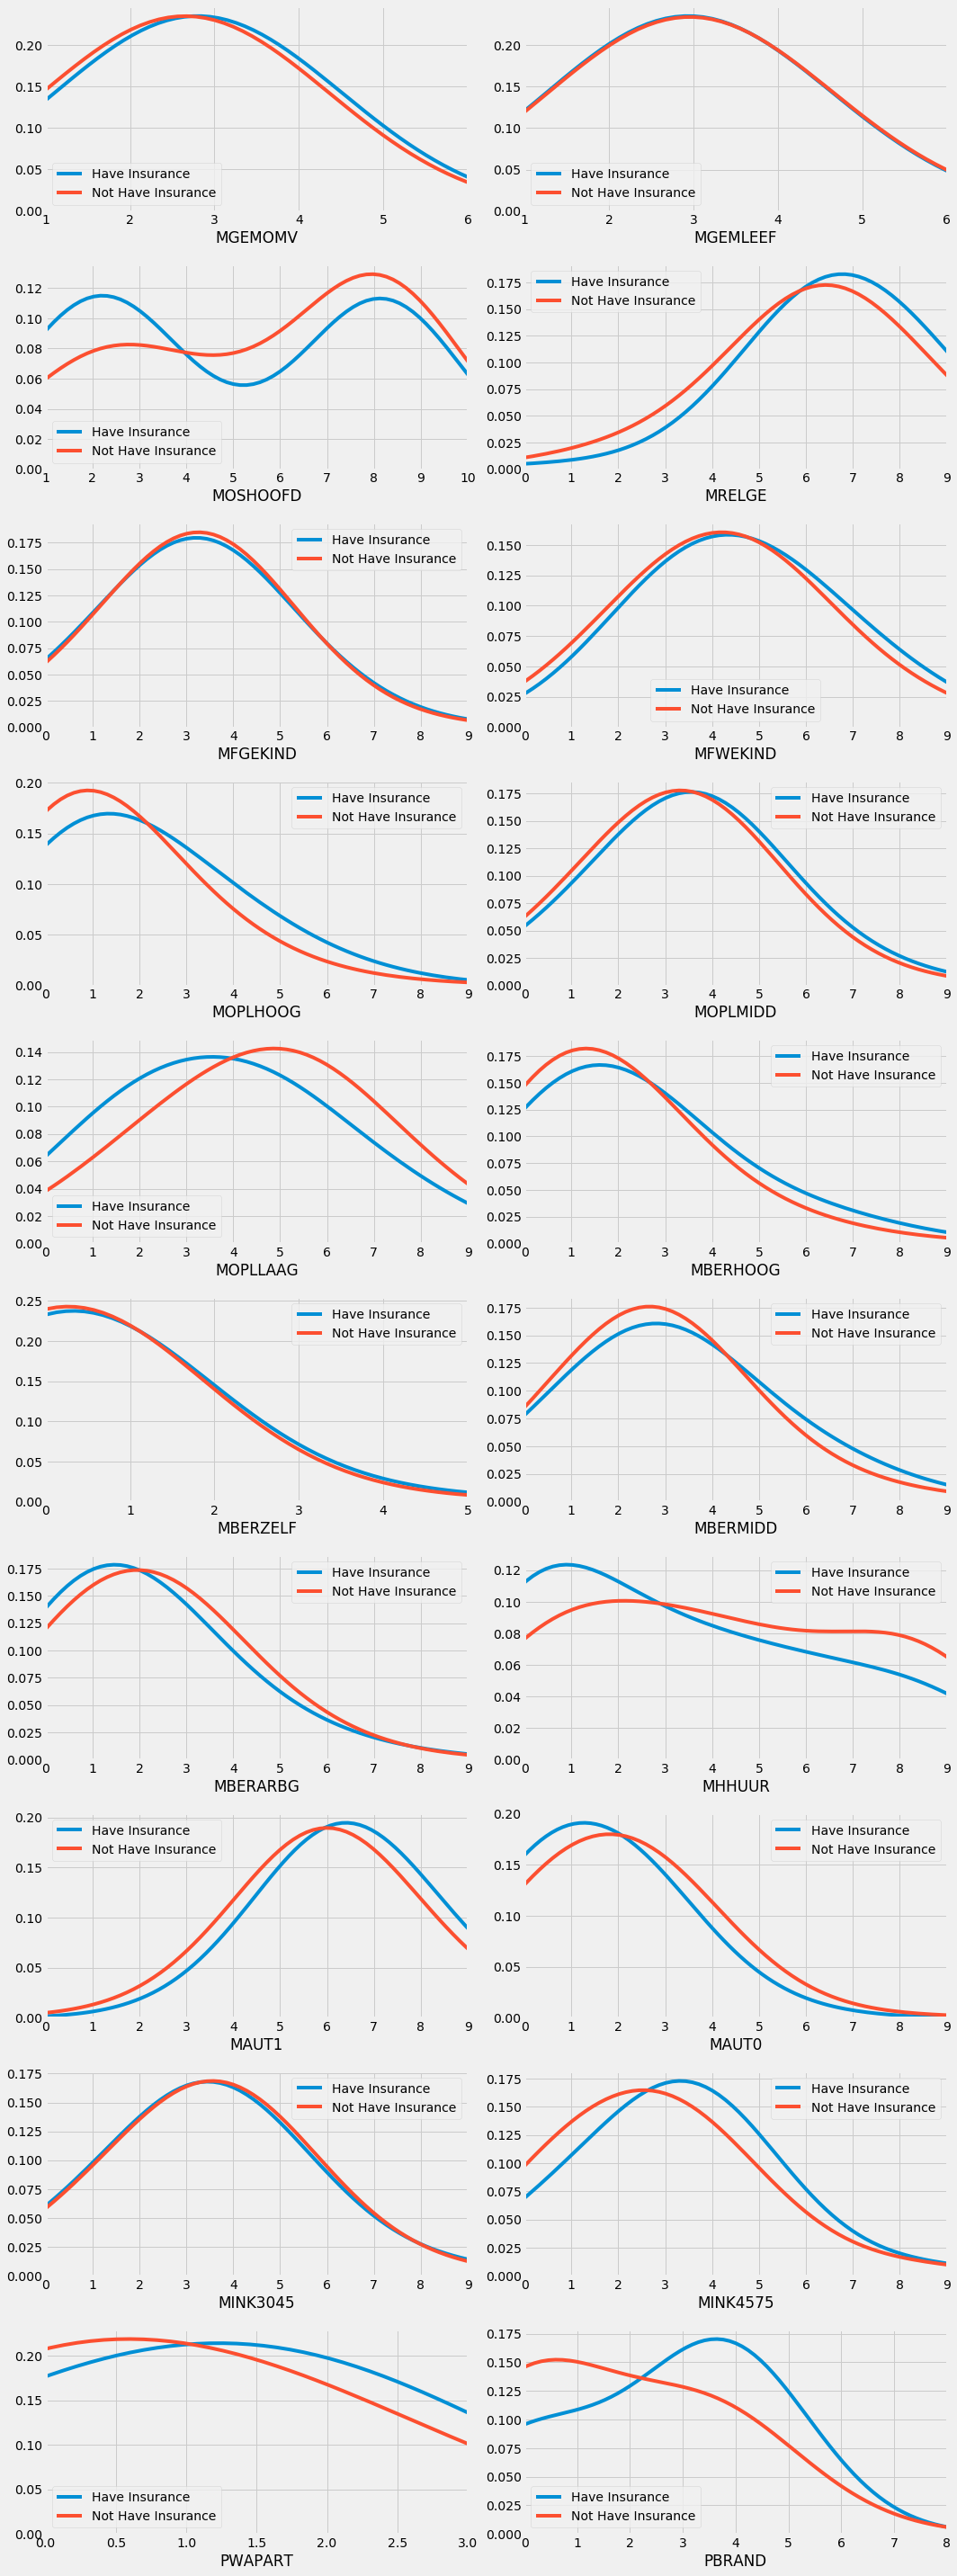

In [181]:
plt.figure(figsize=(15,40))

for i in enumerate(plot_vars):
    plt.subplot(10,2, i[0]+1)
    sb.kdeplot(abc_ins[abc_ins['TARGET']==1][i[1]], bw=1.5, label='Have Insurance')
    sb.kdeplot(abc_ins[abc_ins['TARGET']==0][i[1]], bw=1.5, label='Not Have Insurance')
    plt.xlabel(i[1])
    plt.xlim([abc_ins[i[1]].min(),abc_ins[i[1]].max()])
    plt.legend()

plt.tight_layout()
plt.show();

- ***Observations:***
- If the distribution or the peaks of 'TARGET' == 0 and 'TARGET' == 1 are separated from each other it means their population distribution is different from each other, and this in turn means that they are able to classify customers as buyers and non-buyers of the insurance policy effectively
- **MGEMOMV (Avg size household 1 - 6)**
- In this variable the peak for both 'TARGET'==1 and 'TARGET'==0 is around 3, almost similar, so we can say that this variable is not good at differentiating the both the classes hence this variable may not be useful in predicting the classes classes effectively
- **MGEMLEEF (Avg age)**
- In this variable the peak for both 'TARGET'==1 and 'TARGET'==0 is around 3, almost similar, so we can say that this variable is not good at differentiating the both the classes hence this variable may not be useful in predicting the classes classes effectively
- **MOSHOOFD (Customer main type)**
- In this variable the peak for 'TARGET' == 1 is at customer main type of 2 i.e.'Driven Growers' and 8 i.e. 'Family with grown ups' whereas the peak for 'TARGET' == 0 is at customer main type of 8, 
- It seems that customer main type of 2 have opted for insurance policy and customer main type of 8 have mixed response (some customers have bought and some did not buy insurance policy), so we can say that this variable is able to differentiate between the two classes hence this variable will be useful in predicting the classes effectively
- We need to concentrate more on customer main type of 2 i.e. 'Driven Growers' as they are the customers more likely to by the insurance policy
- **MRELGE (Married)**
- In this variable the peak for 'TARGET' == 1 is at married percentage range 7 i.e. '76-88%'  and the peak for 'TARGET' == 0 is at married percentage range 6 i.e. '63-75%' 
- We can see that customers who have opted for this insurance policy belong to married percentage range 7 whereas who have not taken this policy belong to married percentage range 7 i.e. '76-88%', so we can say that this variable is able to differentiate between the two classes hence this variable will be useful in predicting the classes effectively
- We need to concentrate more on these customers as they are more likely to buy this policy
- **MFGEKIND (Household without children)**
- In this variable the peak for both 'TARGET'==1 and 'TARGET'==0 is at customer main type of 3, almost similar, so we can say that this variable is not good at differentiating the both the classes hence this variable may not be useful in predicting the classes classes effectively
- **MFWEKIND (Household with children)**
- In this variable the peak for both 'TARGET'==1 and 'TARGET'==0 is at customer main type of 4, almost similar, so we can say that this variable is not good at differentiating the both the classes hence this variable may not be useful in predicting the classes classes effectively
- **MOPLHOOG (High level education)**
- For this variable it looks like peak for both 'TARGET' == 1 and 'TARGET' == 0 are at similar education percentage range 0, and drops down as education percentage range increases hence this variable is not useful in predicting the classes effectively
- **MOPLMIDD (Medium level education)**
- In this variable the peak for both 'TARGET' == 1 and 'TARGET' == 0 are at similar education percentage range 3, and drops down as education percentage range increases hence this variable is not useful in predicting the classes effectively
- **MOPLLAAG (Lower level education)**
- In this variable the peak for 'TARGET' == 1 is at education percentage range 3 i.e. '24-36%' and the peak for 'TARGET' == 0 is at education percentage range 5 i.e. '50-62%'
- We can see that generally customers who have opted for this insurance policy belong to education percentage range 3 i.e. '24-36%' whereas who have not taken this policy belong to education percentage range 5 i.e. '50-62%',so we can say that this variable is able to differentiate between the two classes hence this variable will be useful in predicting the classes effectively
- We need to concentrate more on these customers as they are more likely to buy this policy
- **MBERHOOG (High status)**
- In this variable the peak for both 'TARGET' == 1 and 'TARGET' == 0 are at similar high status percentage range 0, and drops down as high status percentage range increases hence this variable is not useful in predicting the classes effectively
- **MBERZELF (Entrepreneur)**
- In this variable the peak for both 'TARGET' == 1 and 'TARGET' == 0 are at similar Entrepreneur percentage range 0, and drops down as Entrepreneur percentage range increases hence this variable is not useful in predicting the classes effectively
- **MBERMIDD (Middle Management)**
- In this variable the peak for both 'TARGET' == 1 and 'TARGET' == 0 are at similar Middle Management percentage range 3, and drops down as Middle Management percentage range increases hence this variable is not useful in predicting the classes effectively
- **MBERARBG (Skilled labourers)**
- In this variable the peak for both 'TARGET' == 1 and 'TARGET' == 0 are at similar Skilled labourers percentage range 2, and drops down as Skilled labourers percentage range increases hence this variable is not useful in predicting the classes effectively
- **MHHUUR (Rented house)**
- In this variable the peak for 'TARGET' == 1 is at Rented house percentage of range 0 i.e. '0%', however for 'TARGET' == 0 the distribution is more like a uniform distribution, since the distrbutions are different we can say that the classes are separated hence this variable will be useful in predicting the classes effectively
- For this variable the peak for 'TARGET' == 1 is at range 0 i.e. '0%', which means customers who have taken this policy have their own houses and indeed that is the case, the number of customers who have Rented house percentage of range 0 i.e. '0%' are 165 and the customers who have taken this policy and have own house is also 165 and their range is 9 i.e. '100%'
- We need to concentrate more on these customers who have own houses as they are more likely to buy this policy
- **MAUT1 (1 car)**
- In this variable the peak for 'TARGET' == 1 is at 1 car percentage range 7 i.e. '76-88%' and the peak for 'TARGET' == 0 is at 1 car percentage range 6 i.e '63-75%'
- Since this variable is able to distinguish which percentage range will buy the policy and which range will not buy the policy, we can say that the distribution is different and so this variable is able to differentiate between the two classes hence this variable will be useful in predicting the classes effectively
- We need to concentrate more on customers who have 1 car as they are more likely to buy this policy
- **MAUT0 (No car)**
- In this variable the peak for 'TARGET' == 1 is at No car percentage range 0 i.e. '0%' and the peak for 'TARGET' == 0 is at No car percentage range 2 i.e. '11-23%'
- Since this variable is able to distinguish which percentage range will buy the policy and which range will not buy the policy, we can say that the distribution is different and so this variable is able to differentiate between the two classes hence this variable will be useful in predicting the classes effectively
- We need to concentrate more on customers who have 1 car as they are more likely to buy this policy
- **MINK3045 (Income 30K-45K)**
- In this variable the peak for both 'TARGET' == 1 and 'TARGET' == 0 are at similar Income 30K-45K percentage range 4, and drops down as Income 30K-45K percentage range increases hence this variable is not useful in predicting the classes effectively
- **MINK4575 (Income 45K-75K)**
- In this variable the peak for 'TARGET' == 1 is at Income 45K-75K percentage range 4 i.e '37-49%' and the peak for 'TARGET' == 0 is at Income 45K-75K percentage range 3 i.e. '24-36%'
- Since this variable is able to distinguish which percentage range will buy the policy and which range will not buy the policy, we can say that the distribution is different and so this variable is able to differentiate between the two classes hence this variable will be useful in predicting the classes effectively
- We need to concentrate more on customers who have income range of 45K-75K as they are more likely to buy this policy
- **PWAPART (Contribution private third party insurance)**
- In this variable the peak for 'TARGET' == 1 is at private third party insurance contribution range $200-$499 and the peak for 'TARGET' == 0 is at private third party insurance contribution range 0, so we can say that there is difference in distribution and so this variable is able to differentiate between the two classes hence this variable will be useful in predicting the classes effectively
- We need to concentrate more on customers who have private third party contribution range of $200-$499 as they are more likely to buy this policy
- **PBRAND (Contribution fire policies)**
- In this variable the peak for 'TARGET' == 1 is at fire policies contribution range $200-$499 and the peak for 'TARGET' == 0 is at fire policies contribution range 0, so we can say that there is difference in distribution and so this variable is able to differentiate between the two classes hence this variable will be useful in predicting the classes effectively
- We need to concentrate more on customers who have fire policy contribution range of $200-$499 as they are more likely to buy this policy

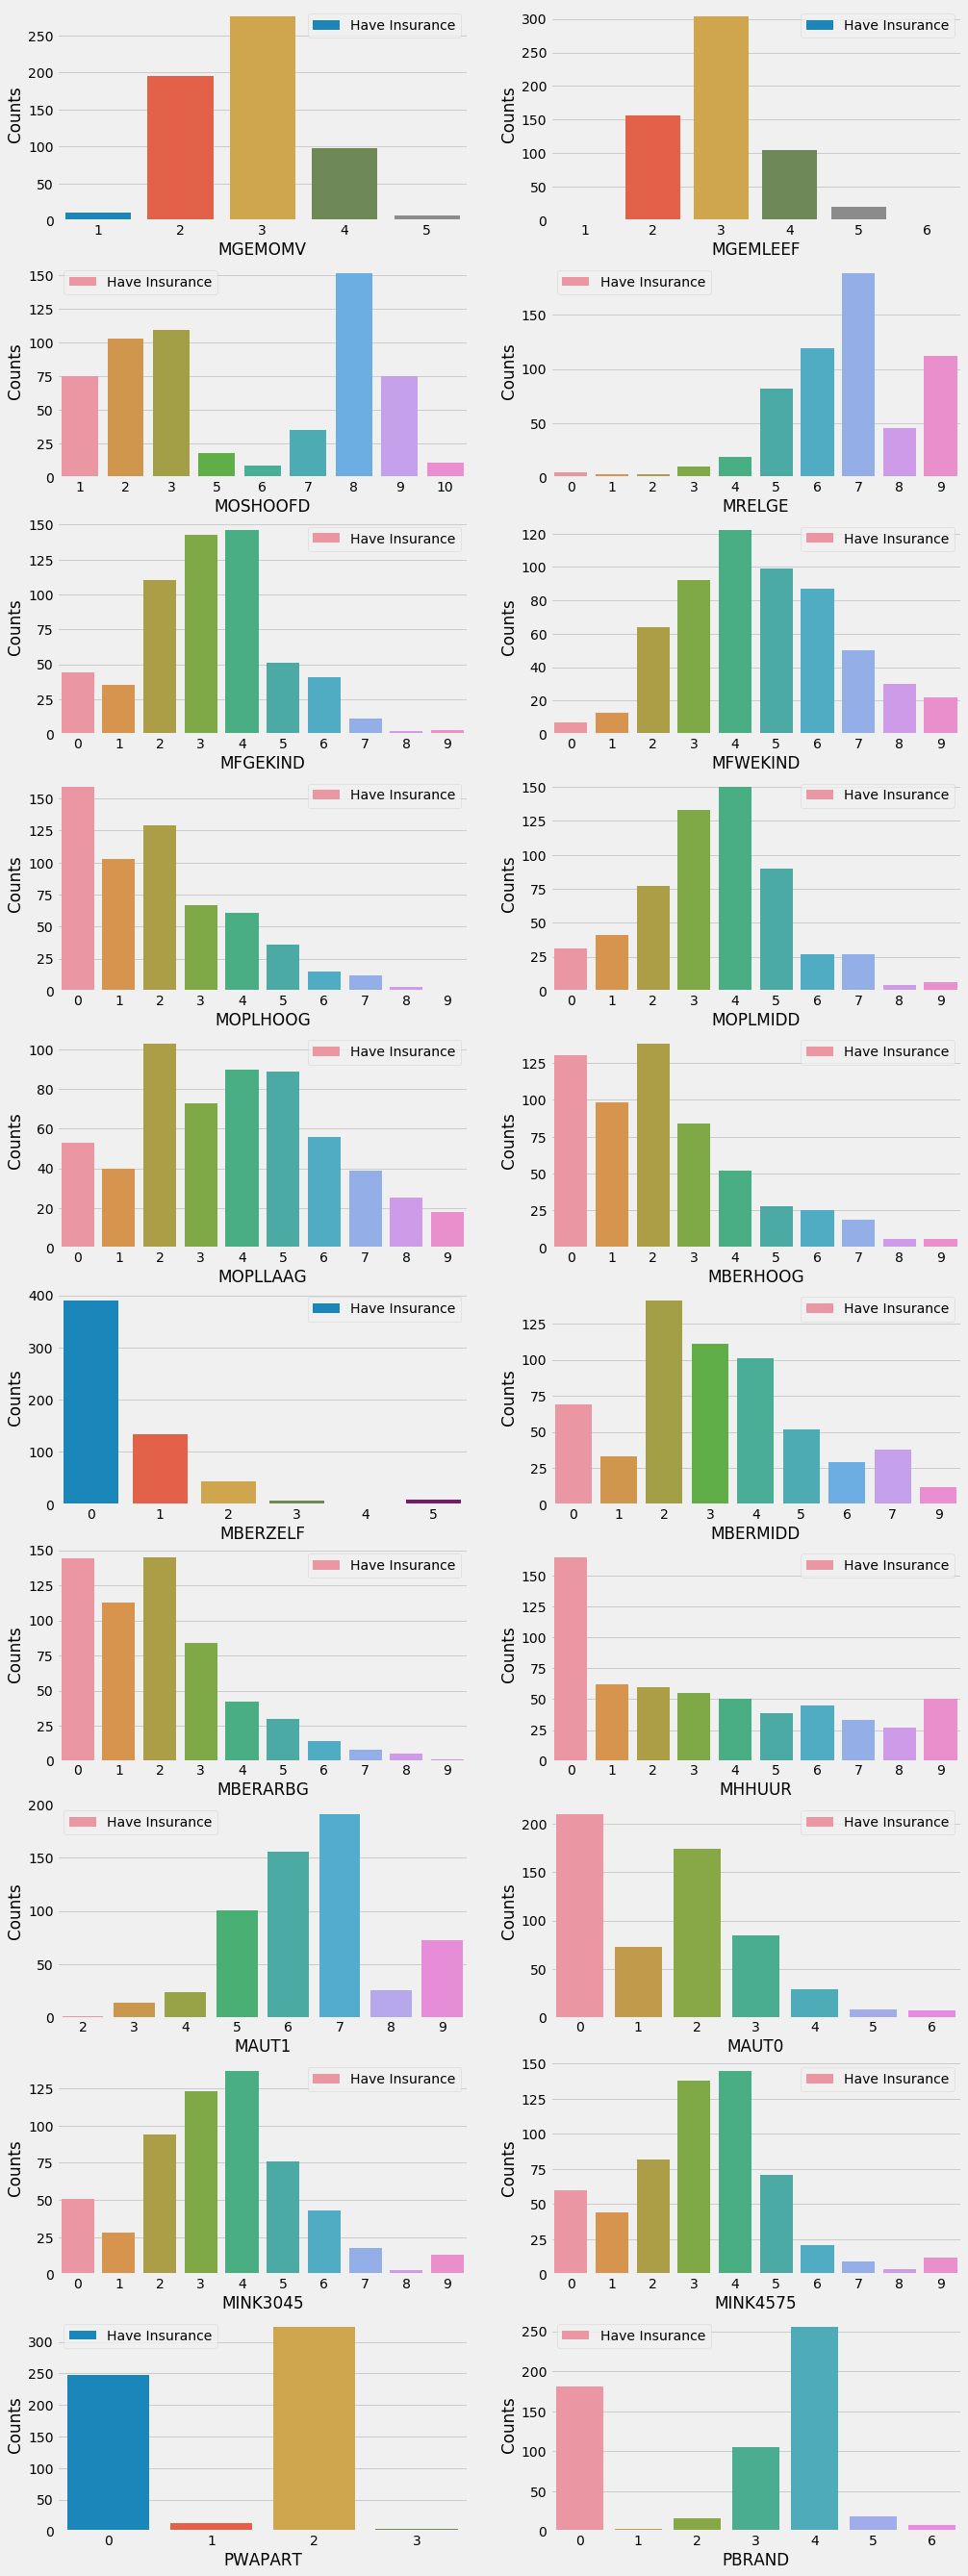

In [66]:
# Plotting barplots of customers who have bought this term insurance policy

plt.figure(figsize=(15,45))

for i in enumerate(plot_vars):
    plt.subplot(10,2, i[0]+1)
    sb.barplot(x=pd.DataFrame(abc_ins_1[i[1]].value_counts()).index,\
                              y=pd.DataFrame(abc_ins_1[i[1]].value_counts())[i[1]], label='Have Insurance')
    plt.ylabel('Counts')
    plt.xlabel(i[1])
    plt.legend()
plt.show();

- ***Observations:***
- **MGEMOMV (Avg size household 1 - 6)**
- The most number of customers who have purchased this term insurance policy are from average household size of 3, second highest being those who have average household size of 2
- Customers who have average household size of 6 are zero i.e. nobody from this household bought this term insurance policy
- **MGEMLEEF (Avg age)**
- The most number of customers who have purchased this term insurance policy are from average age group of 3 i.e. range 40-50 years, second highest being those who have average age group of 2 i.e. 30-40 years
- Least number of customers are from group 1 and group 6 i.e. from range 20-30 years and 70-80 years respectively
- **MOSHOOFD (Customer main type)**
- The most number of customers who have purchased this term insurance policy are from Customer main type of 8 i.e. Family with grown ups, second highest being those who have Customer main type of 3 i.e. Average Family
- Least number of customers are from Customer main type of 6 i.e. Cruising Seniors
- **MRELGE (Married)**
- Large number of customers buying the term insurance are between Married range of 5-9 i.e. between percentage range of '50-100%' highest being in the married percentage range of 7 i.e. '76-88%', it seems this term insurance is popular among married people
- Least number of customers are from married percentage range of 2 and 3 i.e. '11-23%' and '24-36%' respectively
- **MFGEKIND (Household without children)**
- The most number of customers who have purchased this term insurance policy are from Household without children percentage range of 4 i.e. '37-49%', second highest being those who have Household without children percentage range of 3 i.e. '24-36%'
- Least number of customers are from Household without children percentage range of 8 i.e. '89-99%'
- It seems the plot has normal distribution, good number of customers have chosen term policy
- **MFWEKIND (Household with children)**
- The most number of customers who have purchased this term insurance policy are from Household without children percentage range of 4 i.e. '37-49%', second highest being those who have Household without children percentage range of 5 i.e. '50-62%'
- Least number of customers are from Household without children percentage range of 0 i.e. '0%'
- The plot resembles normal distribution, good number of customers have chosen term policy
- **MOPLHOOG (High level education)**
- Large number of customers buying the term insurance are from High level education percentage range of 0 i.e. '0%', which means the term policy is popular among customers who have not received high level education
- Second highest being in the High level education percentage range of 2 i.e. '11-23%'
- Least number of customers are from High level education percentage range of 9 i.e. '100%', which means this policy is not popular among customers where High level education percentage is '100%'
- The plot is right skewed, it seems the term policy is popular among customers with High level education percentage of below 50%
- **MOPLMIDD (Medium level education)**
- Large number of customers buying the term insurance are from Medium level education percentage range of 4 i.e. '37-49%', which means the term policy is popular among customers who have received Medium level education
- Second highest being in the Medium level education percentage range of 3 i.e. '24-36%'
- Least number of customers are from High level education percentage range of 8 i.e. '89-99%', which means this policy is not popular among customers where medium level education percentage below '89%'
- The plot resembles normal distribution, good number of customers have chosen term policy
- **MOPLLAAG (Lower level education)**
- Large number of customers buying the term insurance are from Lower level education percentage range of 2 i.e. '11-23%', which means the term policy is popular among customers who have received Lower level education
- Second highest being in the Lower level education percentage range of 4 i.e. '37-49%'
- Least number of customers are from Lower level education percentage range of 9 i.e. '100%', which means this policy is not popular among customers who have not even received Lower level of education
- It seems the plot has normal distribution, good number of customers have chosen term policy
- **MBERHOOG (High status)**
- Large number of customers buying the term insurance are from High level education percentage range of 2 i.e. '11-23%'
- Second highest being in the High status percentage range of 0 i.e. '0%', which means the term policy is popular among customers where High status percentage is  very less
- Least number of customers are from High status percentage range of 8 and 9 i.e. '89-99%' and '100%', which means this policy is not popular in region where customers have High status
- The plot is right skewed, it seems the term policy is popular among customers with High status percentage of below 50%
- **MBERZELF (Entrepreneur)**
- The most number of customers who have purchased this term insurance policy are from Entrepreneur percentage range of 0 i.e. '0%'
- Second highest being those who are in Entrepreneur percentage range of 1 i.e. '1-10%'
- Customers who have Entrepreneur percentage range of 4 are zero i.e. nobody from this percentage range have bought this term insurance policy, which those who bought this insurance generally are not entrepreneurs
- The plot is right skewed, it seems the term policy is popular among customers with High status percentage of below 10%
- **MBERMIDD (Middle management)**
- The most number of customers who have purchased this term insurance policy are from Middle management percentage range of 2 i.e. '11-23%', second highest being those who have Middle management percentage range of 3 i.e. '24-36%'
- Least number of customers are from Middle management percentage range of 9 i.e. '100%', it seems thsi insurance is popular between range 2-5
- It seems the plot has normal distribution, good number of customers have chosen term policy
- **MBERARBG (Skilled labourers)**
- Large number of customers buying the term insurance are from Skilled labourers percentage range of 2 and 0 i.e. '11-23%' and '0%' respectively
- Second highest being in the Skilled labourers percentage range of 1 i.e. '1-10%', which means the term policy is popular among customers where Skilled labourers percentage is very less
- Least number of customers are from Skilled labourers percentage range of 9 i.e. '100%', which means this policy is not popular in region with High Skilled labourers percentage
- The plot is right skewed, it seems the term policy is popular in region where Skilled labourers percentage is below 49%
- **MHHUUR (Rented house)**
- The most number of customers who have purchased this term insurance policy are from Rented house percentage range of 0 i.e. '0%', this means policy is popular with customers who do not live in rented houses
- Second highest being those who are from Rented house percentage range of 9 i.e. '100%'
- Between highest range and second highest range for Rented house percentage the distribution is almost uniform, which means the term insurance is neither popular nor not popular
- **MAUT1 (1 car)**
- The most number of customers who have purchased this term insurance policy are from 1 car percentage range of 7 i.e. '76-88%', second highest being those who have 1 car percentage range of 6 i.e. '63-75%'
- Least number of customers are those who have 1 car percentage range of 2 i.e. '11-23%', 
- It seems this insurance is popular between range 5-7 i.e. '50-88%' and also range 9 i.e. '100%', which means this policy is popular among more than 50% of customers with 1 car
- **MAUT0 (No car)**
- The most number of customers who have purchased this term insurance policy are from No car percentage range of 0 i.e. '0%', which means those who have this term policy own atleast one car
- Second highest being those who have No car percentage range of 2 i.e. '11-23%'
- Least number of customers are those who have No car percentage range of 6 i.e. '63-75%'
- The plot is right skewed, it seems the term policy is popular in region where No car percentage is below 36%
- **MINK3045 (Income 30K-45K)**
- The most number of customers who have purchased this term insurance policy are from Income 30K-45K percentage range of 4 i.e. '37-49%'
- Second highest being those who have Income 30K-45K percentage range of 3 i.e. '24-36%'
- Least number of customers are those who have Income 30K-45K percentage range of 8 i.e. '89-99%'
- It seems the plot has normal distribution, good number of customers have chosen term policy
- It seems this insurance is popular between range 2-5 i.e. '11-62%'
- **MINK4575 (Income 45K-75K)**
- The most number of customers who have purchased this term insurance policy are from Income 45K-75K percentage range of 4 i.e. '37-49%'
- Second highest being those who have Income 45K-75K percentage range of 3 i.e. '24-36%'
- Least number of customers are those who have Income 45K-75K percentage range of 8 i.e. '89-99%'
- It seems the plot has normal distribution, good number of customers have chosen term policy
- This variable has a distribution similar to that of variable 'MINK3045', it seems this insurance is popular between range 2-5 i.e. '11-62%'
- **PWAPART (Contribution private third party insurance)**
- The most number of customers who have purchased this term insurance policy are from Contribution private third party insurance amount range of 2 i.e. '$50-$99'
- Second highest being those who have Contribution private third party insurance amount range of 0 i.e. no contribution
- Least number of customers are those who have Contribution private third party insurance amount range of 3 i.e. '$100-$199'
- Need to cover customers having high amount private third party insurance contribution
- **PBRAND (Contribution fire policies)**
- The most number of customers who have purchased this term insurance policy are from Contribution fire policies amount range of 4 i.e. '$200-$499'
- Second highest being those who have Contribution fire policies amount range of 0 i.e. no contribution
- Least number of customers are those who have Contribution fire policies amount range of 1 i.e. '$1-$49'

- **Correlation Analysis**

In [185]:
# Creating a correlation table

df = abc_ins.drop(['ID', 'TARGET'], axis=1)
corr=df.corr().where(np.triu(np.ones(df.corr().shape),k=1).astype(bool)).unstack()\
                                                                          .reset_index()
corr.rename(columns={'level_0':'Var1','level_1':'Var2',0:'corr_1'},inplace=True)
corr.dropna(subset=['corr_1'],inplace=True)
corr['corr_1']=round(corr['corr_1'],4)
corr['corr_1_abs']=corr['corr_1'].abs()
corr.sort_values(by='corr_1_abs',inplace=True,ascending=False)
corr.tail(30)

,Var1,Var2,corr_1,corr_1_abs
1500,MAUT2,MFGEKIND,0.0025,0.0025
2208,APERSAUT,MOSTYPE,-0.0025,0.0025
2288,ABRAND,MAUT0,-0.0024,0.0024
2127,PBRAND,MOPLMIDD,0.0023,0.0023
2194,AWAPART,MZPART,0.0021,0.0021
1604,MZFONDS,MBERMIDD,-0.0021,0.0021
2246,APERSAUT,MINK7512,-0.0021,0.0021
2102,PPERSAUT,MINK7512,-0.0020,0.0020
2080,PPERSAUT,MOPLLAAG,-0.0020,0.0020
2223,APERSAUT,MOPLMIDD,0.0018,0.0018


- ***Observations:***
- There are lot of variables which are highly correlated with each other
- The variables like ***'MHKOOP-MHHUUR', 'MZPART-MZFONDS', 'AWAPART-PWAPART', 'APERSAUT-PPERSAUT', 'MRELOV-MRELGE', 'ABRAND-PBRAND', 'MOSHOOFD_10-MOSTYPE_41', 'MOSHOOFD_2-MOSTYPE_8', 'MFWEKIND-MGEMOMV', 'MGODGE-MGODPR', 'MFALLEEN-MRELOV', 'MOPLLAAG-MOPLMIDD', 'MAUT0-MAUT1'***, have correlation of more than 0.70 (both positive and negative correlation included) with each other
- The variables like ***'PPERSAUT-MOPLHOOG', 'MINK3045-MSKB1', 'MOSTYPE_27-MBERHOOG', 'AWAPART-MBERARBG', 'MOSTYPE_20-MAUT1'***, have least correlation of 0.0001 with each other
- **Note:** Our aim is to predict high recall, hence it is not necessary to remove highly correlated variables as we are not interpreting the model on feature importance, still if we want to remove them it is acceptable

# 7. Data Pre-processing

In [186]:
abc_ins.head()

,ID,MOSTYPE,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PPERSAUT,PBRAND,AWAPART,APERSAUT,ABRAND,TARGET
0,1,33,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,6,5,0,1,1,0
1,2,37,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,2,2,0,1,0
2,3,37,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,6,2,1,1,1,0
3,4,9,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,6,2,0,1,1,0
4,5,40,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,6,0,0,1,0


- **Dummy encoding**

In [22]:
# Dummy encoding the nominal variables

abc_ins_dummy = pd.get_dummies(data=abc_ins, columns=['MOSTYPE', 'MOSHOOFD'], drop_first=True)

In [23]:
# Checking shape of dataframe after dummy encoding

abc_ins_dummy.shape

(9822, 96)

- **Performing X, y split**

In [24]:
# Bifurcating features and target variable

X = abc_ins_dummy.drop(['TARGET', 'ID'], axis=1)
y = abc_ins_dummy['TARGET']

### Using `RFE` for feature selection

In [193]:
%%time
# # Using 'XGBOOST Classifier' and 'RFE' for finding optimum number of features

listed = [50,45,40,35,30,25,20,15,10]

def recall_list_xgb(X, y, listed):
    recall = []
    for i in listed:
        model = XGBClassifier(scale_pos_weight=15.76)
        rfe = RFE(model,n_features_to_select=i)
        rfe = rfe.fit(X,y)
        col = X.columns[rfe.support_]
        X = X[col]
        xgb = XGBClassifier(scale_pos_weight=15.76)
        xgb_model = xgb.fit(X, y)
        recall.append(recall_score(y, xgb_model.predict(X[col])))
    return recall
rec_output_xgb = recall_list_xgb(X,y,listed)
print(rec_output_xgb)

[0.7764505119453925, 0.7901023890784983, 0.7935153583617748, 0.7713310580204779, 0.773037542662116, 0.7781569965870307, 0.7747440273037542, 0.7491467576791809, 0.7474402730375427]
Wall time: 3min 39s


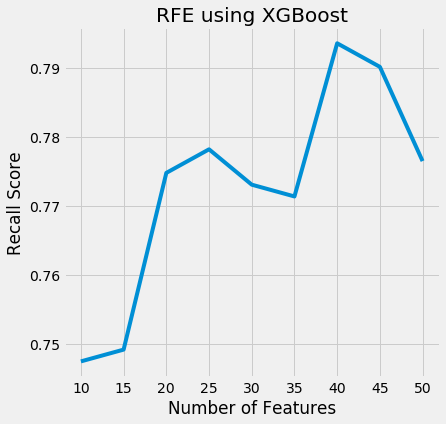

In [195]:
# Plotting results of RFE

plt.figure(figsize=(6,6))
sb.lineplot(x=listed, y=rec_output_xgb)
plt.xlabel('Number of Features')
plt.ylabel('Recall Score')
plt.xticks(ticks=[10,15,20,25,30,35,40,45,50])
plt.title('RFE using XGBoost')
plt.show();

- ***Observations:***
- Number of features = 40 gives recall score of above 0.79, however this may lead to overfitting
- We will be using number of features = 20 to avoid overfiting, also with only 20 features we are able to achieve recall of 0.775 which is close 0.78, which is not bad

# 8. Model Building and Evaluation

- **Building XGBoost default model using Cross-Validate**

In [34]:
# Taking copy of 'X'

X_xgb = X.copy()

In [35]:
# Using 'LogisticRegression' and 'RFE' for feature selection - Selecting 20 features

xgb = XGBClassifier(scale_pos_weight=15.76)
rfe_xgb = RFE(xgb,n_features_to_select=20)
rfe_xgb_model = rfe_xgb.fit(X_xgb,y)

In [36]:
# Keeping only those columns which were selected using RFE

feat_col_xgb = X_xgb.columns[rfe_xgb_model.support_]
X_xgb = X_xgb[feat_col_xgb]
X_xgb.head()

,MGODPR,MGODOV,MRELGE,MFWEKIND,MOPLLAAG,MBERBOER,MBERMIDD,MHHUUR,MAUT1,MINKM30,MINKGEM,MKOOPKLA,PWAPART,PPERSAUT,PBRAND,MOSTYPE_10,MOSTYPE_35,MOSHOOFD_5,MOSHOOFD_9,MOSHOOFD_10
0,5,1,7,6,7,1,2,1,8,0,4,3,0,6,5,0,0,0,0,0
1,4,1,6,5,4,0,5,2,7,2,5,4,2,0,2,0,0,0,0,0
2,4,2,3,2,4,0,7,7,7,4,3,4,2,6,2,0,0,0,0,0
3,3,2,5,4,2,0,3,5,9,1,4,4,0,6,2,0,0,0,0,0
4,4,1,7,4,0,4,0,4,6,0,6,3,0,0,6,0,0,0,0,1


In [26]:
feat_col_xgb= ['MGODPR', 'MGODOV', 'MRELGE', 'MFWEKIND', 'MOPLLAAG', 'MBERBOER',
       'MBERMIDD', 'MHHUUR', 'MAUT1', 'MINKM30', 'MINKGEM', 'MKOOPKLA',
       'PWAPART', 'PPERSAUT', 'PBRAND', 'MOSTYPE_10', 'MOSTYPE_35',
       'MOSHOOFD_5', 'MOSHOOFD_9', 'MOSHOOFD_10']

In [37]:
%%time
# Using cross validate to get mean 'accuracy', 'recall', 'precision' for training

rkf = RepeatedStratifiedKFold(random_state=42, n_repeats=10)
score_xgb = cross_validate(estimator=XGBClassifier(scale_pos_weight=15.76),
                       X=X_xgb, y=y, 
                       scoring=['accuracy', 'recall'], 
                       return_train_score=True,return_estimator=True,
                       cv=rkf, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 54.6 s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   54.5s finished


In [38]:
# Sorting the data frame by 'test_recall' in descending order

pd.DataFrame(score_xgb).sort_values(by='test_recall', ascending=False).head()

,fit_time,score_time,estimator,test_accuracy,train_accuracy,test_recall,train_recall
11,0.919995,0.021351,XGBClassifier(scale_pos_weight=15.76),0.720102,0.743286,0.728814,0.771368
45,1.091297,0.025481,XGBClassifier(scale_pos_weight=15.76),0.728244,0.738068,0.726496,0.780384
30,1.115454,0.017664,XGBClassifier(scale_pos_weight=15.76),0.731298,0.745959,0.709402,0.763326
29,0.940036,0.020261,XGBClassifier(scale_pos_weight=15.76),0.727088,0.740901,0.692308,0.795309
6,0.700265,0.023802,XGBClassifier(scale_pos_weight=15.76),0.728244,0.749395,0.686441,0.794872


- ***Observations:***
- We can see that `test_accuracy = 0.72`, `test_recall = 0.73` and `test_precision = 0.14`
- 'test_precision' is very low, one of the reason may be class imbalance
- We will use `SMOTE` technique to deal with class imbalance

### Dealing with class imbalance - SMOTE

In [210]:
# Using SMOTE technique for dealing with class imbalance

from imblearn.over_sampling import SMOTE

smt = SMOTE()

X_smote, y_smote = smt.fit_resample(X, y)

In [211]:
# Checking shape of the resultant data sets

X_smote.shape, y_smote.shape

((18472, 94), (18472,))

- **Building XGBoost default model using Cross-Validate - SMOTE**

In [208]:
rec_xgb_smote = recall_list_xgb(X_smote,y_smote,listed)
print(rec_xgb_smote)

[0.999025552187094, 0.9988090082286705, 0.999025552187094, 0.9987007362494587, 0.9988090082286705, 0.9984841922910351, 0.9985924642702468, 0.9988090082286705, 1.0]


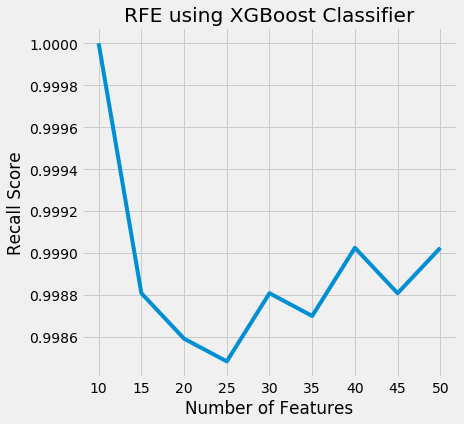

In [209]:
# Plotting results of RFE

plt.figure(figsize=(6,6))
sb.lineplot(x=listed, y=rec_xgb_smote)
plt.xlabel('Number of Features')
plt.ylabel('Recall Score')
plt.xticks(ticks=[10,15,20,25,30,35,40,45,50])
plt.title('RFE using XGBoost Classifier')
plt.show();

In [213]:
# Taking copy of 'X_train_scaled_smote'

X_xgb_smote = X_smote.copy()

In [214]:
# Using 'XGBoost Classifier' and 'RFE' for feature selection - Selecting 15 features

xgb_smote = XGBClassifier()
rfe_xgb_smote = RFE(xgb_smote,n_features_to_select=15)
rfe_xgb_smote = rfe_xgb_smote.fit(X_xgb_smote,y_smote)

In [215]:
# Keeping only those columns which were selected using RFE

feat_col_smote = X_xgb_smote.columns[rfe_xgb_smote.support_]
X_xgb_smote = X_xgb_smote[feat_col_smote]
X_xgb_smote.head()

,MBERBOER,MAUT0,MINKM30,PPERSAUT,PBRAND,APERSAUT,ABRAND,MOSTYPE_9,MOSHOOFD_3,MOSHOOFD_5,MOSHOOFD_6,MOSHOOFD_7,MOSHOOFD_8,MOSHOOFD_9,MOSHOOFD_10
0,1,1,0,6,5,1,1,0,0,0,0,0,1,0,0
1,0,2,2,0,2,0,1,0,0,0,0,0,1,0,0
2,0,2,4,6,2,1,1,0,0,0,0,0,1,0,0
3,0,0,1,6,2,1,1,1,1,0,0,0,0,0,0
4,4,1,0,0,6,0,1,0,0,0,0,0,0,0,1


In [216]:
%%time
# Using cross validate to get mean 'accuracy', 'recall', 'precision' for training after performing SMOTE

rkf = RepeatedStratifiedKFold(random_state=42, n_repeats=10)
score_xgb_smote = cross_validate(estimator=XGBClassifier(),
                       X=X_xgb_smote, y=y_smote, 
                       scoring=['accuracy', 'recall'], 
                       return_train_score=True,return_estimator=True,
                       cv=rkf, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 1min 32s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


In [217]:
# Sorting the data frame by 'test_recall' in descending order

pd.DataFrame(score_xgb_smote).sort_values(by='test_recall', ascending=False).head()

,fit_time,score_time,estimator,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision
5,1.653759,0.043105,XGBClassifier(),0.808119,0.810719,0.839740,0.827988,0.789715,0.800366
48,1.588881,0.026757,XGBClassifier(),0.820249,0.806401,0.838657,0.821085,0.808877,0.797660
41,1.531012,0.033202,XGBClassifier(),0.815156,0.807674,0.836039,0.825663,0.802597,0.796969
38,1.956130,0.034114,XGBClassifier(),0.802382,0.812153,0.835409,0.827311,0.783647,0.802969
29,1.711116,0.026733,XGBClassifier(),0.818083,0.806401,0.834326,0.822845,0.808076,0.796646


- ***Observations:***
- We can see that `test_accuracy = 0.81`, `test_recall = 0.84`
- 'test_accuracy' and 'test_recall' has improved after using SMOTE tecgnique

### Applying Grid Search for finding optimum Hyperparameters

In [219]:
%%time
# Performing Grid Search on the train data set using XGBoost as the estimator

gs_xgb = XGBClassifier()

param = {'learning_rate': [0.001,0.01,0.1,0.2,0.3,0.9],
        'max_depth':[5,10,15,20,25],
        'min_child_weight':[20,25,30,35],
        'n_estimators':[50,100,200,300,500]}


gs_xgb_model = GridSearchCV(estimator=gs_xgb,
                      param_grid=param,
                      n_jobs=-1,
                      cv=3,
                      scoring='recall',
                      return_train_score=True,
                      verbose=1)

gs_xgb_model.fit(X_xgb_smote, y_smote)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 46.2min finished


Wall time: 46min 35s


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.9],
                         'max_depth': [5, 10, 15, 20, 25],
                         'min_child_weight': [20, 25, 30, 35],
                         'n_estimators': [50, 100, 200, 300, 500]},
             return_train_score=True, scoring='recall', verbose=1)

In [220]:
# Converting results for grid search which is a dictionary into a data frame

gs_cv_results = pd.DataFrame(gs_xgb_model.cv_results_)
gs_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.080199,0.137481,0.036852,0.005154,0.001,5,20,50,"{'learning_rate': 0.001, 'max_depth': 5, 'min_...",0.627801,0.624756,0.750893,0.667817,0.058757,598,0.651616,0.630399,0.737210,0.673075,0.046170
1,3.967630,0.298513,0.059745,0.002980,0.001,5,20,100,"{'learning_rate': 0.001, 'max_depth': 5, 'min_...",0.627801,0.624756,0.750244,0.667600,0.058451,599,0.651616,0.630399,0.736398,0.672804,0.045794
2,8.647072,0.822854,0.128409,0.004180,0.001,5,20,200,"{'learning_rate': 0.001, 'max_depth': 5, 'min_...",0.626827,0.624756,0.750244,0.667276,0.058673,600,0.651129,0.630399,0.734936,0.672155,0.045192
3,14.665648,0.271517,0.229614,0.011927,0.001,5,20,300,"{'learning_rate': 0.001, 'max_depth': 5, 'min_...",0.744722,0.643600,0.745372,0.711231,0.047823,591,0.772292,0.643228,0.731200,0.715573,0.053836
4,23.403649,0.408924,0.497075,0.129589,0.001,5,20,500,"{'learning_rate': 0.001, 'max_depth': 5, 'min_...",0.746346,0.737817,0.739201,0.741121,0.003738,587,0.775053,0.743261,0.724379,0.747564,0.020910


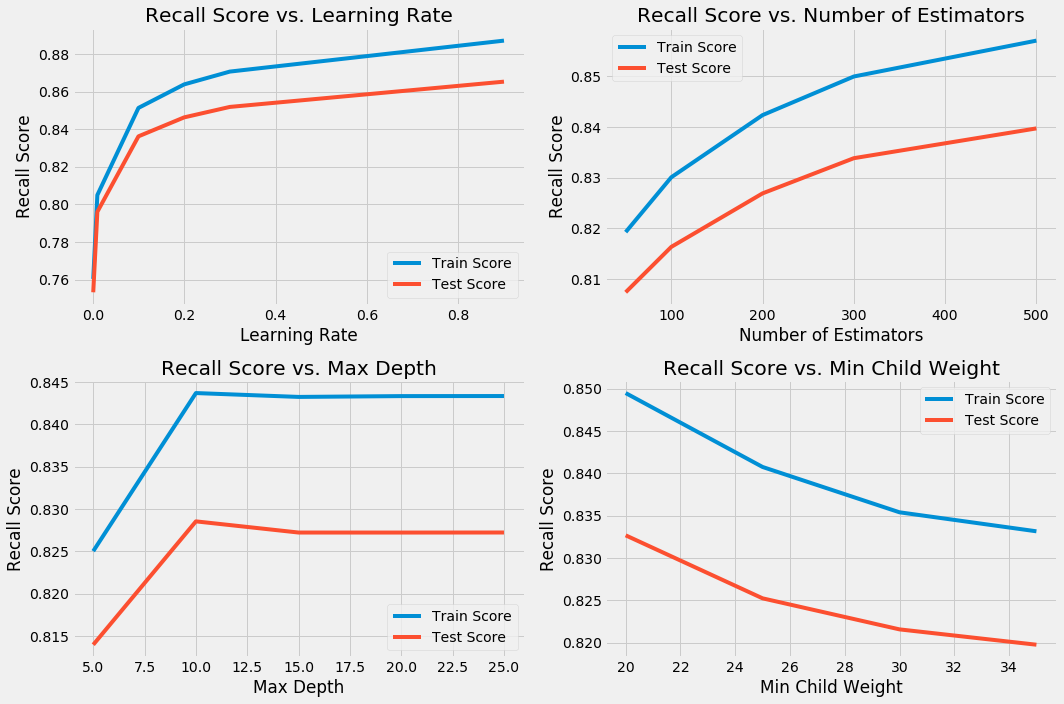

In [221]:
# Plotting mean_test_score against the hyper-parameters

plt.figure(figsize=(15,10))

plt.subplot(221)
sb.lineplot(x=gs_cv_results['param_learning_rate'], y=gs_cv_results['mean_train_score'], label='Train Score', ci=None)
sb.lineplot(x=gs_cv_results['param_learning_rate'], y=gs_cv_results['mean_test_score'], label='Test Score', ci=None)
plt.xlabel('Learning Rate')
plt.ylabel('Recall Score')
plt.title('Recall Score vs. Learning Rate')

plt.subplot(222)
sb.lineplot(x=gs_cv_results['param_n_estimators'], y=gs_cv_results['mean_train_score'], label='Train Score', ci=None)
sb.lineplot(x=gs_cv_results['param_n_estimators'], y=gs_cv_results['mean_test_score'], label='Test Score', ci=None)
plt.xlabel('Number of Estimators')
plt.ylabel('Recall Score')
plt.title('Recall Score vs. Number of Estimators')

plt.subplot(223)
sb.lineplot(x=gs_cv_results['param_max_depth'], y=gs_cv_results['mean_train_score'], label='Train Score', ci=None)
sb.lineplot(x=gs_cv_results['param_max_depth'], y=gs_cv_results['mean_test_score'], label='Test Score', ci=None)
plt.xlabel('Max Depth')
plt.ylabel('Recall Score')
plt.title('Recall Score vs. Max Depth')

plt.subplot(224)
sb.lineplot(x=gs_cv_results['param_min_child_weight'], y=gs_cv_results['mean_train_score'], label='Train Score', ci=None)
sb.lineplot(x=gs_cv_results['param_min_child_weight'], y=gs_cv_results['mean_test_score'], label='Test Score', ci=None)
plt.xlabel('Min Child Weight')
plt.ylabel('Recall Score')
plt.title('Recall Score vs. Min Child Weight')


plt.legend()
plt.tight_layout()
plt.show();

In [222]:
# Checking the best parameters chosen by grid search model

gs_xgb_model.best_params_  # {'learning_rate': 0.9, 'max_depth': 20, 'min_child_weight': 20, 'n_estimators': 500}

{'learning_rate': 0.9,
 'max_depth': 20,
 'min_child_weight': 20,
 'n_estimators': 500}

- **Applying `GridSearch` parameters after performing SMOTE on the original data set** 

In [229]:
gs_xgb = XGBClassifier(learning_rate=0.9, max_depth=20, 
                      min_child_weight=20, n_estimators=500)

X_gs = X[feat_col_smote]
gs_xgb_model = gs_xgb.fit(X_gs, y)
y_pred_gs = gs_xgb_model.predict(X_gs)

In [230]:
print('Accuracy score is: ', accuracy_score(y, y_pred_gs))
print('Recall score is: ', recall_score(y, y_pred_gs))

Accuracy score is:  0.9427815108939116
Recall score is:  0.04948805460750853
Precision score is:  0.8529411764705882


- ***Observations:***
- GridSearch parameters {'learning_rate': 0.9, 'max_depth': 20, 'min_child_weight': 20, 'n_estimators': 500} give `Recall = 0.05` and `Accuracy = 0.94`
- After performing grid search on SMOTE data set the accuracy increased, however, the recall score is very low
- We will be using cross validation model to predict the original data set

- **Applying `Cross validate` default parameters on the original data set** 

In [41]:
X_cv = X[feat_col_xgb]
cv_est_xgb = score_xgb['estimator'][11]
cv_est_xgb = cv_est_xgb.fit(X_cv, y)
print('Accuracy score is: ', accuracy_score(y, cv_est_xgb.predict(X_cv)))
print('Recall score is: ', recall_score(y, cv_est_xgb.predict(X_cv)))

Accuracy score is:  0.7408878028914682
Recall score is:  0.7747440273037542


- ***Observations:***
- Cross-validate with default parameters give `Recall = 0.77` and `Accuracy = 0.74`
- We will use this model for predicting probability of customer churning and assigning it to original data set

# 9. Assigning churn probabilities to the customers

In [42]:
# Predicting churn probabilities

y_pred_proba = pd.DataFrame(cv_est_xgb.predict_proba(X_cv))[1]
y_pred_proba[:5]

0    0.538549
1    0.324491
2    0.444344
3    0.602105
4    0.079502
Name: 1, dtype: float32

In [43]:
# Creating a new insurance data frame and adding 'Churn_Proba' column

new_ins_df = abc_ins.drop('TARGET', axis=1)
new_ins_df['Policy_Proba'] = y_pred_proba.round(2)*100
new_ins_df.head()

,ID,MOSTYPE,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PPERSAUT,PBRAND,AWAPART,APERSAUT,ABRAND,Policy_Proba
0,1,33,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,6,5,0,1,1,54.000004
1,2,37,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,2,2,0,1,32.000000
2,3,37,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,6,2,1,1,1,44.000000
3,4,9,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,6,2,0,1,1,60.000004
4,5,40,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,6,0,0,1,8.000000


In [44]:
new_ins_df.shape

(9822, 50)

# 10. Building KMeans clustering

### Preparing data for modelling

- **`Avg_Age`:** Segmenting churn on the basis of average age of customer
- **`Social_Class`:** Segmenting Churn on the basis of social class of the customer
- **`Income_Range`:** Segmenting churn on the basis of income of the customer generated 
- **`Churn_proba`:** Segmenting churn on the basis of churn probability of the customer generated 

- **Creating 'Income_Range' variable**

In [45]:
# Creating a copy of 'new_ins_df'

df = new_ins_df.copy()

In [46]:
# Creating a new column 'Income_Range' to divide incomes in 'Lower', 'Medium' and 'High' range

df['Income_Range'] = 0

In [111]:
# Creating a group of 'Lower' range

# df.loc[df['MINKM30'] >= 6, 'Income_Range'] = 'Lower'
# df.loc[df['MINK3045'] >= 6, 'Income_Range'] = 'Lower'
# df.loc[(df['MINK4575'] == 0)&(df['MINK7512'] == 0)&(df['MINK123M'] == 0)&(df['Income_Range'] == 0), 'Income_Range'] = 'Lower'
# df.loc[(df['MINK4575'] <= 3)&(df['MINK7512'] <= 3)&(df['MINK123M'] <= 3)&(df['Income_Range'] == 0), 'Income_Range'] = 'Lower'
# df.loc[(df['MINK123M']==1)&(df['Income_Range']==0), 'Income_Range'] = 'Lower'

In [112]:
# Creating a group of 'High' range

# df.loc[df['MINK123M'] >= 6, 'Income_Range'] = 'High'
# df.loc[df['MINK7512'] >= 6, 'Income_Range'] = 'High'
# df.loc[(df['MINKM30'] == 0)&(df['MINK3045'] == 0)&(df['MINK4575'] == 0)&(df['Income_Range'] == 0), 'Income_Range'] = 'High'
# df.loc[(df['MINKM30'] <= 3)&(df['MINK3045'] <= 3)&(df['MINK4575'] <= 3)&(df['MINK7512'] <= 3)\
#        &(df['Income_Range'] == 0), 'Income_Range'] = 'High'

In [113]:
# Creating a group of 'Medium' range

# df.loc[df['MINK4575'] >= 6, 'Income_Range'] = 'Medium'
# df.loc[(df['MINKM30'] <= 3)&(df['MINK3045'] <= 3)&(df['MINK7512'] <= 3)&(df['MINK123M'] <= 3)\
#        &(df['Income_Range'] == 0), 'Income_Range'] = 'Medium'
# df.loc[((df['MINKM30']==0)|(df['MINK3045']==0)|(df['MINK7512']==0)|\
#         (df['MINK123M']==0))&(df['Income_Range']==0), 'Income_Range'] = 'Medium'

In [74]:
df.loc[((df['MINKM30']<=3) & (df['MINK3045']<=3)), 'Income_Range'] = 'High'
df.loc[((df['MINKM30']>=6) | (df['MINK3045']>=6))&(df['Income_Range']==0), 'Income_Range'] = 'Low'
df.loc[df['Income_Range']==0, 'Income_Range'] = 'Medium'

- **Creating 'Social_Class' variable**

In [75]:
df['Social_Class'] = 0

In [76]:
# Creating 'Social_Class' of 'A', 'B' and 'C'

df.loc[(df['MSKA']<=3)&(df['MSKD']<=3), 'Social_Class'] = 'B'
df.loc[((df['MSKD']>3)&(df['MSKD']<6))&(df['Social_Class']==0),'Social_Class'] = 'A'
df.loc[((df['MSKA']>3)&(df['MSKA']<6))&(df['Social_Class']==0),'Social_Class'] = 'C'
df.loc[(df['MSKA']>=6)&(df['Social_Class']==0),'Social_Class'] = 'A'
df.loc[(df['MSKD']>=6)&(df['Social_Class']==0),'Social_Class'] = 'C'

In [77]:
df.head()

,ID,MOSTYPE,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PPERSAUT,PBRAND,AWAPART,APERSAUT,ABRAND,Policy_Proba,Income_Range,Social_Class
0,1,33,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,6,5,0,1,1,54.000004,Medium,B
1,2,37,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,2,2,0,1,32.000000,High,B
2,3,37,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,6,2,1,1,1,44.000000,Medium,B
3,4,9,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,6,2,0,1,1,60.000004,Medium,B
4,5,40,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,6,0,0,1,8.000000,High,A


- **Creating data frame for KMeans Clustering**

In [78]:
term_ins = df[['MGEMLEEF', 'Income_Range', 'Social_Class', 'Policy_Proba']].copy()
term_ins.rename({'MGEMLEEF':'Avg_Age'}, axis=1, inplace=True)
term_ins.head()

,Avg_Age,Income_Range,Social_Class,Policy_Proba
0,2,Medium,B,54.000004
1,2,High,B,32.000000
2,2,Medium,B,44.000000
3,3,Medium,B,60.000004
4,2,High,A,8.000000


In [79]:
term_ins.shape

(9822, 4)

- **Ordinal Encoding**

In [81]:
ir = ['Low', 'Medium', 'High']
sc = ['C', 'B', 'A']
oe = OrdinalEncoder(categories=[ir,sc])
oe.fit(term_ins[['Income_Range', 'Social_Class']])
term_ins[['Income_Range', 'Social_Class']] = oe.transform(term_ins[['Income_Range', 'Social_Class']])

In [82]:
term_ins.head()

,Avg_Age,Income_Range,Social_Class,Policy_Proba
0,2,1.0,1.0,54.000004
1,2,2.0,1.0,32.000000
2,2,1.0,1.0,44.000000
3,3,1.0,1.0,60.000004
4,2,2.0,2.0,8.000000


### Feature Scaling - Standard Scaler

In [83]:
# Initiating, fitting and transforming the variables

kmeans_scaled = term_ins.copy()

sc = StandardScaler()
kmeans_scaled[list(term_ins.columns)] = sc.fit_transform(kmeans_scaled[list(term_ins.columns)])
kmeans_scaled.head()

,Avg_Age,Income_Range,Social_Class,Policy_Proba
0,-1.238396,-0.101858,-0.059292,0.723385
1,-1.238396,1.311210,-0.059292,-0.265718
2,-1.238396,-0.101858,-0.059292,0.273792
3,0.004429,-0.101858,-0.059292,0.993140
4,-1.238396,1.311210,2.367230,-1.344739


In [84]:
# Checking shape of the new data frame

kmeans_scaled.shape

(9822, 4)

### Performing Hopkins test

In [85]:
# Hopkins Statistic Code

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [86]:
%%time
# Use the Hopkins Statistic function by passing the above dataframe as a paramter by taking average of 10 scores
hopkin_list=[]
for i in range(10):
    hopkin_list.append(hopkins(kmeans_scaled))
print(np.mean(hopkin_list))

0.9932642524936158
Wall time: 59.8 s


- ***Hopkins test is performed to evaluate whether the data sets contains meaningful clusters (i.e.: non-random structures) or not. If yes, then how many clusters are there. This process is defined as the assessing of clustering tendency or the feasibility of the clustering analysis***
<br>

- ***Observations:***
- Performed hopkins test to check whether we can perform clustering on those 4 variables
- Always recommended to run hopkins test for 8-10 times as the score changes every time
- For hopkins score, performed for loop for 10 times and took average of them as data is large and system we are using is slow
- Average hopkins score of 0.99 means we can perform clustering
- For a particular dataset, if hopkins score is above 0.60 then, we can be perform clustering on that dataset

### Performing KMeans Clustering

- **Finding the optimum number of Clusters**

#### Elbow Method

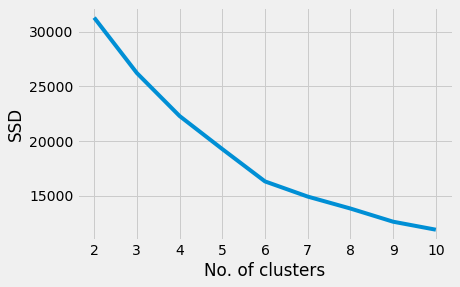

In [87]:
range_clusters = [2,3,4,5,6,7,8,9,10]
ssd = []

for cluster in range_clusters:
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(kmeans_scaled)
    ssd.append(kmeans.inertia_)

# plot the SSDs for each number of clusters

sb.lineplot(x=range_clusters,y=ssd)
plt.xticks(ticks=np.arange(2,11))
plt.xlabel('No. of clusters')
plt.ylabel('SSD')
plt.show();

- ***Observations:***
- It looks like `6` or `9` number of clusters will be appropriate for clustering purpose after looking at SSD
- However we will be using `9` clusters and check if it fits well by looking at the visualization for those clusters
- Also we will be analysing silhouette score to confirm our choice of number of clusters
- **Note:** The reason we are going with such a large number of clusters is because the variables 'Avg_Age', 'Income_Range' and 'Social_Class' have been provided in range of years and percentages in the data set and not in continuous numbers

#### Silhouette Score

In [88]:
%%time
range_clusters = [2,3,4,5,6,7,8,9,10]

for cluster in range_clusters:
    
    # initialize kmeans
    kmeans = KMeans(n_clusters=cluster)
    km = kmeans.fit(kmeans_scaled)
    cluster_labels = km.labels_
    
    # silhouette score
    sil_score = silhouette_score(kmeans_scaled,cluster_labels)
    print(f'For clusters={cluster}, the silhouette score is {sil_score}')

For clusters=2, the silhouette score is 0.21466469208497552
For clusters=3, the silhouette score is 0.24807191437662168
For clusters=4, the silhouette score is 0.2561247294597218
For clusters=5, the silhouette score is 0.27683919502297577
For clusters=6, the silhouette score is 0.2984292494735528
For clusters=7, the silhouette score is 0.2993300246770785
For clusters=8, the silhouette score is 0.30451632840813436
For clusters=9, the silhouette score is 0.31714613576360434
For clusters=10, the silhouette score is 0.3278438912630473
Wall time: 38.7 s


- ***Observations:***
- Here according to silhouette score anything above 5 number of clusters will be apropriate for clustering purpose as the score continues to increase with each number
- Still we will be using only `9` number of clusters and check if it fits well by looking at the visualization for those clusters

### K-Means with `4 clusters`

In [122]:
# Fitting KMeans clustering with 'n_clusters=3'

kmeans = KMeans(n_clusters=4, random_state=20)
kmeans.fit(kmeans_scaled)

KMeans(n_clusters=4, random_state=20)

In [123]:
# Adding 'Cluster_labels' column to the 'kmeans_ins' dataframe

term_ins['Cluster_labels'] = kmeans.labels_
term_ins = pd.concat([abc_ins['ID'], term_ins], axis=1)
term_ins.head()

,ID,ID,ID,ID,ID,ID,ID,ID,ID,Avg_Age,Income_Range,Social_Class,Policy_Proba,Cluster_labels
0,1,1,1,1,1,1,1,1,1,2,1.0,1.0,54.000004,2
1,2,2,2,2,2,2,2,2,2,2,2.0,1.0,32.000000,1
2,3,3,3,3,3,3,3,3,3,2,1.0,1.0,44.000000,2
3,4,4,4,4,4,4,4,4,4,3,1.0,1.0,60.000004,1
4,5,5,5,5,5,5,5,5,5,2,2.0,2.0,8.000000,0


In [124]:
# Checking value counts after creating 'Cluster_labels' column

term_ins.Cluster_labels.value_counts()

2    4093
1    3309
3    1480
0     940
Name: Cluster_labels, dtype: int64

### Model Evaluation

- **Cluster Profiling**

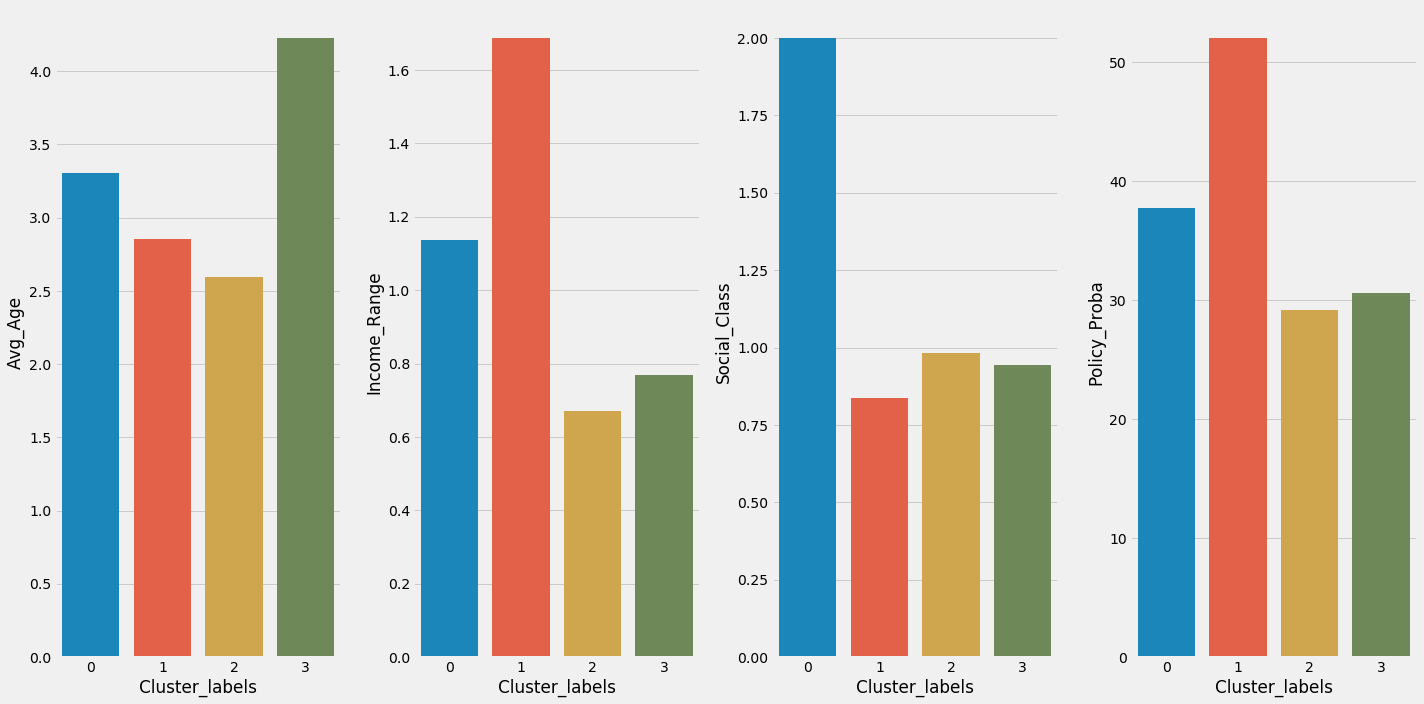

In [126]:
# Cluster Profiling by plotting barplots

plt.figure(figsize=(20,10))
plt.subplot(141)
sb.barplot(x='Cluster_labels',y='Avg_Age',data=term_ins, ci=None)

plt.subplot(142)
sb.barplot(x='Cluster_labels',y='Income_Range',data=term_ins, ci=None)

plt.subplot(143)
sb.barplot(x='Cluster_labels',y='Social_Class',data=term_ins, ci=None)

plt.subplot(144)
sb.barplot(x='Cluster_labels',y='Policy_Proba',data=term_ins, ci=None)

plt.tight_layout()
plt.show();

- ***Observations:***
- **`Cluster 0`**
- We can see that customers in this cluster have 'Avg_Age' range of more than 3 i.e. more than 50 years, may be older customers
- It has customers with 'Income_Range' of 1 i.e. Medium income range
- It has customers with 'Social_Class' of 2 i.e. social class of 'A'
- Also it has 'Policy_Proba' of around 40%, though less however second highest among all the clusters
- **`Cluster 1`**
- We can see that customers in this cluster have 'Avg_Age' range around 3 i.e. between 40-50 years, which means middle aged customers
- It has customers with 'Income_Range' of 1.6 i.e. Medium to High income range
- It has customers with 'Social_Class' of around 0.75 i.e. social class of 'C'
- From the plot we can see that customers in cluster 1 have highest probaility of taking term insurance policy when compared to rest of the clusters
- **`Cluster 2`**
- We can see that customers in this cluster have 'Avg_Age' range of around 2.5 i.e. around 30-35 years, younger generation 
- It has customers with 'Income_Range' of around 0.6 i.e. Low income range
- It has customers with 'Social_Class' of around 1 i.e. social class of 'B'
- Also it has 'Policy_Proba' of below 30%, least among all the clusters
- **`Cluster 3`**
- We can see that customers in this cluster have 'Avg_Age' range of above 4 i.e. age above 60 years, old age customers 
- It has customers with 'Income_Range' of around 0.8 i.e. between Low and Medium income range
- It has customers with 'Social_Class' of around 1 i.e. social class between 'C' and 'B'
- Also it has 'Policy_Proba' of above 30%, third highest among all the clusters

# Conclusion

- From the above bar plot we can infer that the customers who are of age 40-50, having medium income range, belonging to class 'C' have more probability of buying the term insurance i.e. customers belonging to `Cluster 1`
- We can also concentrate on customers who are of age above 50, having medium income range, belonging to class 'A' as they have second highest probability of buying the term insurance i.e. customers belonging to `Cluster 0`
- A thing to notice is that there is still large customer base to tap, especially customers who have high income and of young ageas they can be our potential customers